In [ ]:
#!git clone https://github.com/neuralcomputer/ML_School.git

# Тема № 14.  Деревья решений и случайный лес

## Дерево принятия решений
На предыдущих занятиях мы познакомились с некоторыми методами машинного обучения - линейной и логистической  регрессиями. У этих, и у многих других методов, есть недостаток - результаты метода слабо понятны обычному человеку, или как говорят *слабо интерпретируемы*.

Действительно как объяснить человеку что

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) > 5 это слон, а 

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) < 5 это собака?

Как вообще можно складывать величины разной размерности рост в метрах и вес в килограммах, на уроках физики нам говорили что так нельзя, а здесь в линейной регрессии именно так и происходит. Хоть эти методы могут давать хорошие результаты, но объяснимость их очень маленькая. 

Человек думает и принимает решения по другому. ЕСЛИ сегодня выходной ТОГДА я не пойду в школу. ЕСЛИ мне поставят оценку больше 3 ТОГДА я буду хорошим учеником ИНАЧЕ плохим. 

Подобным образом на основе правил вида "ЕСЛИ ... ТОГДА ... ИНАЧЕ" (IF...THEN...ELSE...) рассуждает человек и это ему понятно. Вот бы и компьютер заставить думать также. Хм, но именно так мы пишем программы для компьютера, знакомая конструкция любого языка программирования, не правда ли?

Одного правила для принятия решения может быть не достаточно - тогда можем применить несколько правил, например:
```
ЕСЛИ оценка больше 4
ТОГДА отдыхать
ИНАЧЕ ЕСЛИ оценка больше 3
----- ТОГДА немножко подучить
----- ИНАЧЕ ЕСЛИ оценка больше 2
----------- ТОГДА учиться очень усердно
----------- ИНАЧЕ придется отчисляться
```
Раз мы можем написать такие правила для нашего решения, тогда что мешает это сделать компьютеру?

Для любой задачи, например классификации чего-нибудь, можем построить такие правила в виде некоторой иерархии. Пример на рисунке ниже.

Используя некоторую информацию об автовладельцах - атрибуты или признаки - страховая компания принимает решение страховать или нет такого автовладельца.

![img](https://drive.google.com/uc?id=1XuKxi0uZNJOSk9GqKDMgi7-ILXv9MYrO)

Изображения иерархии подобных правил напоминают изображение дерева (перевернутого вверх корнем), поэтому так и называются - **дерево принятия решений**. Места разветвлений - узлы, конечные узлы, которые уже не разветвляются - листья. Самый первый (верхний) узел - корень дерева. Это просто названия и никакой связи с биологическими деревьями нет.  В принципе деревья могут быть разной структуры, но мы будем говорить только о деревьях с ответами правил типа ДА\НЕТ.

## Обучение (создание) дерева

Когда дерево уже кем-то создано, мы можем им пользоваться без проблем, проверяя правила и таким образом выискивая подходящее решение.

Но дерево нужно создать, обучить. Для этого придумано множество методов, мы рассмотрим только один метод ["CART"](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms)        (Classification and Regression Trees) реализованный в библиотеке `sklearn`. 

Пусть, как и обычно в задачах классификации с учителем, имеется L обучающих векторов примеров входов \\(x^l\\) с n компонентами (атрибутами) каждый и столько же меток y описывающих класс, к которому относится каждый из примеров. Будем рассматривать только правила с ответами ДА/НЕТ и условиями вида \\(x_i^l \leq t_i\\),  t - некоторые пороги для атрибутов.

Для построения каждого узла дерева возьмем один из атрибутов (компонент входа) и сравним его с порогом. Разделим все обучающие примеры Q этого узла на две части, выборки, в одну Ql (левую) войдут примеры у которых условие \\(x_i^l \leq t_i\\) выполняется, а в другую Qr (правую) примеры у которых условие не выполняется. 
Посчитаем для этих двух выборок некоторую величину H(), называемую *неопределенность* (impurity, еще называют ее "загрязненность", "неточность", "критерий") и общую неопределенность узла

G = (число примеров в Ql)/(общее число примеров в Q)* H(Ql)+ (число примеров в Qr)/(общее число примеров в Q)* H(Qr).

И сделаем это для всех атрибутов и всех возможных значений порога этих атрибутов. Выберем такой атрибут и порог, для которых G минимально. По ним и будем окончательно строить узел.

Начиная с корня, в котором присутствуют все обучающие примеры \\(x^l\\), будем создавать новые и новые узлы, постепенно разбивая набор этих примеров на меньшие части по выбранным атрибутам и порогам пока не останется в каждом узле по одному примеру, или не выполнятся другие критерии останова обучения.

Так и получится дерево решений.

Реализовано несколько разных критериев *H()*. Такой критерий должен давать маленькое число, если мы смогли за одно разделение отделить классы полностью (идеальное разделение) и большое, если число примеров разного класса в разделенных множествах примерно одинаково (бесполезное разделение), например:

А) Для задач классификации на K классов:

1) *Неопределенность Джини*: для каждого класса считаем долю (p) примеров этого класса во всех примерах (их \\(N_m\\) штук) узла m (метки *y* представлены целыми числами от 0 до K-1) и считаем H() как 

$ p_k=\frac{1}{N_m}* \sum_{x_i \in Q_m} I(y_i=k), I=1\ если \ совпадает, \ 0 \ если  \ не \  совпадает \\
\\ H = \sum_{k} p_k*(1-p_k) \\ $

2) *Энтропия*:

$ H = - \sum_{k} p_k*log(p_k) \\ $

3) *Ошибка классификации*: 

$ H = 1-max(p_k) \\ $

Б) Для задач регрессии обычно используют среднеквадратичную ошибку:
сначала ищут среднее значение меток y в примерах узла m

$ y_{mean} = \frac{1}{N_m} \sum_{i\in N_m} y_i \\ $

а потом ищут среднеквадратичную ошибку

$ H =  \frac{1}{N_m} \sum_{i\in N_m} (y_i-y_{mean})^2 \\ $

Прекрасную анимацию создания дерева можно найти [здесь](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

Давайте реализуем классификатор на основе дерева для примеров [ирисов Фишера](https://ru.wikipedia.org/wiki/Ирисы_Фишера#Описание). В библиотеке `sklearn` есть модуль `tree` с различными функциями для деревьев, используем от туда `DecisionTreeClassifier()` для создания классификатора. Синтаксис его аналогичен другим классификаторам: команда `fit()` для обучения, `predict()` для расчета выходов. Для отображения дерева используем команду `plot_tree()` (она вернет и текстовое описание дерева), которая покажет для каждого узла выбранный атрибут (как индекс входного массива), порог, число примеров в узле общее (samples) и по классам (values), значение критерия (здесь gini).      

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

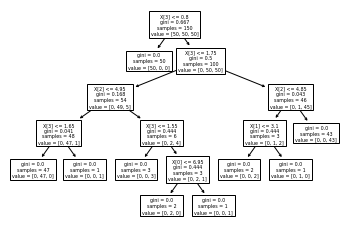

In [ ]:
from sklearn.datasets import load_iris # примеры данных 
from sklearn import tree # модуль для деревьев
iris = load_iris() # загружаем данные
X=iris.data # примеры входов
y=iris.target # метки (примеры выходов)
clf = tree.DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X, y) # обучаем его, т.е. создаем само дерево
tree.plot_tree(clf) # отображаем

### `graphviz`
Для более наглядного отображения деревьев рекомендуется использовать библиотеку [`graphviz`](https://graphviz.org/), которая позволяет сохранять и отображать деревья в специальном формате **DOT**.


Примечание: Нужно установить и библиотеку и ее исполняемые файлы, не забыть прописать путь к ней в системную переменную PATH.

In [ ]:
import graphviz # подключаем библиотеку для отображения деревьев
dot_data = tree.export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл) 
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("iris") # отображаем в файл (по умолчанию pdf)

'iris.pdf'

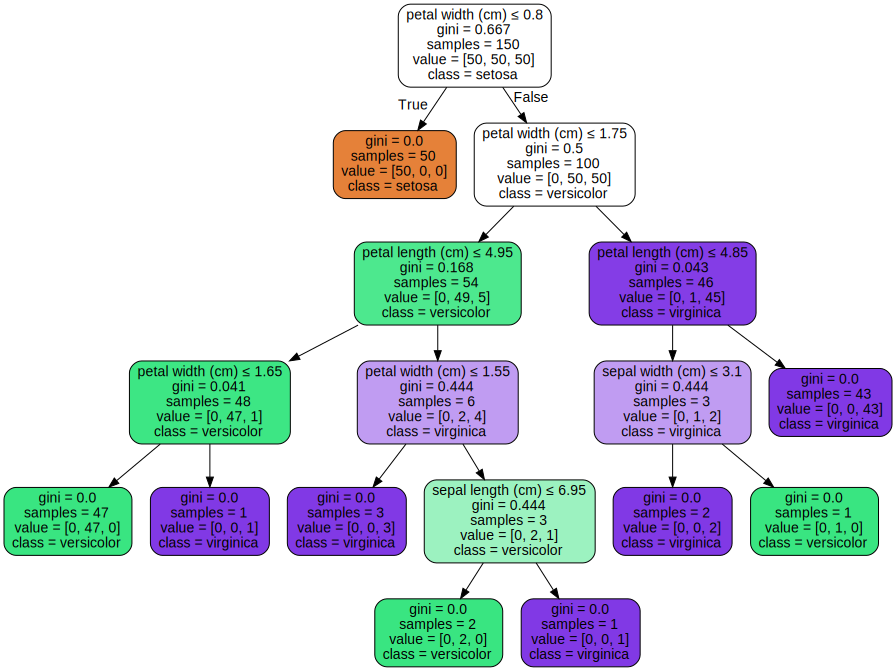

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,  # можем указать дополнительные опции конвертации
                     feature_names=iris.feature_names, #  названия атрибутов
                     class_names=iris.target_names,   # названия классов
                     filled=True, rounded=True,  # прочие детали отображения
                     special_characters=True)  #
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

Функция `export_text()` из того же модуля `sklearn.tree` позволяет отобразить дерево в форматированном текстовом виде правил ЕСЛИ...ТОГДА...ИНАЧЕ  

In [ ]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=iris['feature_names']) # переводим дерево в текстовую строку
print(r) # печатаем

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### Разделяющая поверхность
Раз деревом можно решать задачу классификации, то оно реализует какую-то разделяющую поверхность. Зная устройство дерева подумайте немного, как выглядит эта поверхность (на двумерном примере проще всего).

Подумали? Теперь выполните код ниже, чтобы убедиться, что разделяющая поверхность для дерева в двумерном случае это набор прямоугольников, возможно вырожденных в линию или точку. 

Чтобы можно было отобразить на плоскости, будем строить несколько деревьев для пар атрибутов и рисовать разделяющие поверхности.


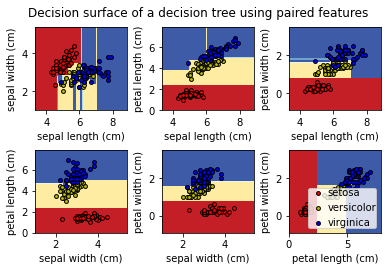

In [ ]:
import numpy as np #
import matplotlib.pyplot as plt #

from sklearn.datasets import load_iris #
from sklearn.tree import DecisionTreeClassifier, plot_tree #

# Parameters
n_classes = 3 # число классов
plot_colors = "ryb" # цвета
plot_step = 0.02 # шаг для симуляции на плоскости

# Load data
iris = load_iris() # загружаем данные

# в цикле по числу пар атрибутов 
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    X = iris.data[:, pair] # Выбираем заданные пары атрибутов
    y = iris.target # метки

    # Обучение
    clf = DecisionTreeClassifier().fit(X, y) # обучаем дерево на текущей паре атрибутов

    # Строим графики
    plt.subplot(2, 3, pairidx + 1) # подграфик для текущей пары

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # немного измененные минимальное и максимальые значения превого атрибута 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # немного измененные минимальное и максимальые значения второго атрибута 
    # считаем прямоугольную сетку возможных значений этих атрибутов
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), #
                         np.arange(y_min, y_max, plot_step)) #
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5) # более компактный график
    
    # считаем выход классификатора для всех примеров сетки
    # не забыв что массивы данных нужно привести к требуемому размеру.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) # и преобразуем обратно к исходному размеру
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) # рисуем контурную карту

    plt.xlabel(iris.feature_names[pair[0]]) # добавляем подписи осей
    plt.ylabel(iris.feature_names[pair[1]]) #

    # Отображаем обучающие примеры своим цветом
    for i, color in zip(range(n_classes), plot_colors): # в цикле по количеству классов
        idx = np.where(y == i) # отбираем все точки текущего класса 
        # отображаем их своим цветом
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], #
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15) #

plt.suptitle("Decision surface of a decision tree using paired features") # подписываем график
plt.legend(loc='lower right', borderpad=0, handletextpad=0) # легенда
plt.axis("tight"); # отображение осей

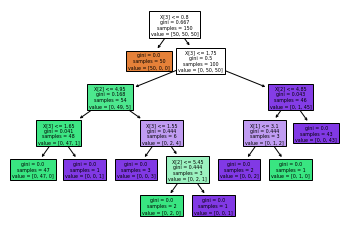

In [ ]:
# построим и отобразим дерево для всех 3 классов.
plt.figure() #
clf = DecisionTreeClassifier().fit(iris.data, iris.target) #
plot_tree(clf, filled=True) #
plt.show() #

Еще более красивая и наглядная визуализация деревьев возможна с помощью библиотеки [`dtreeviz`](https://github.com/parrt/dtreeviz). Но мы оставим ее изучение на самостоятельную работу.

# Случайный лес
Дерево решений может оказаться очень большим, со многими уровнями, и его считать придется очень долго. Это не эффективно. Можно ограничить *глубину* дерева (число уровней), но тогда пострадает качество решения задачи. Выход - использовать много меньших деревьев. Пусть одно из них не сможет точно решить задачу, но их совокупность может быть точнее. Если 90 из 100 деревьев сообщают о классе №1, а остальные о классе №2, то можно поверить большинству и в окончательном решении принять класс №1. Получается что не одно дерево, а их множество (совокупность, комитет, объединение и пр. синонимы) будет принимать решение. Тогда отдельное дерево можно сделать по-проще, с меньшей глубиной.

Но правило толпы, что выбор наиболее популярного решения будет более правильный и точный, как и в нашей жизни с голосованиями, работает далеко не всегда. Важно, чтобы голосующие были как можно меньше связаны между собой, чтобы не впадать в общие заблуждения. Так же и для деревьев, надо чтобы деревья в этом множестве были не совсем похожи друг на друга. Этого можно добиться (частично) если деревья создавать на случайно выбранных подмножествах примеров (возможно с повторениями) и случайно выбранных атрибутах.

Множество деревьев это лес :). А множество случайно созданных деревьев это **случайный лес** (random forest по английски). Это очень мощный, популярный и эффективный метод машинного обучения. Часто это первый кандидат для решения поставленной задачи.

В библиотеке `sklearn` случайный лес для классификации реализован в классе [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) входящим в модуль `ensemble` (почему так, а не в модуле `tree` мы узнаем на последующих занятиях).

При создании такого классификатора указываются:
* `n_estimators` - максимальное число деревьев в лесу
* `criterion` - критерий для создания узла: или критерий Джини `gini` (по умолчанию), или энтропия `entropy`.
* `max_depth` - максимальная глубина дерева
* `max_features` - максимальное число атрибутов, которые будут проверены при создании узла, по умолчанию это равно корню квадратному из числа всех атрибутов в данных.  
* `max_samples` - максимальное число примеров используемых для одного дерева (примеры выбираются случайно). 
* и другие менее важные аргументы. 

Создаваемый объект класса `RandomForestClassifier` имеет важные поля:
* `estimators_` - список объектов деревьев (типа `DecisionTreeClassifier`) в этом лесу
* `classes_` - метки классов
* `n_classes_` - число классов
* `n_features_` - число атрибутов
* `n_outputs_` - число выходов
* [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) - оценка **важности** атрибутов. Очень полезные сведения, показывающие какой вклад дает тот или иной атрибут в точность решения задачи. Полезно, например, для существенного уменьшения размера дерева: удалив атрибуты с малой важностью не сильно потеряем в точности. Полезно и для интерпретируемости результатов. Вычисляется как суммарная величина уменьшения критерия неопределенности для этого атрибута.

Реализованы методы:
* `apply()` - применение деревьев и расчет индексов листьев 
* `decision_path()` - возвращает конкретный путь принятия решения по лесу 
* `fit()` - обучение леса
* `predict()` - расчет класса для заданного примера
* `score()` - расчет средней точности классификатора для заданных примеров 
* и другие.




  

### Пример случайного леса на синтетических данных
Давайте создадим некоторые данные с двумя классами на плоскости и классифицируем их случайным лесом. Воспользуемся функцией `make_classification`  из `sklearn.datasets` для создания данных в виде двух пересекающихся классов с шумом, и функцией `train_test_split` из `sklearn.model_selection` для разделения их на обучающие и тестовые примеры. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


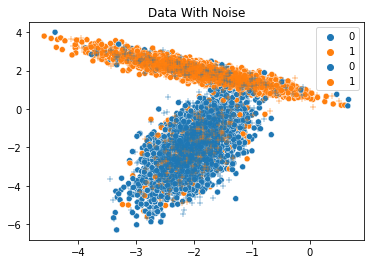

In [ ]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# создаем данные
X,y = make_classification(n_samples=10000, # число примеров
                          n_features=2, # число признаков (атрибутов)
                          n_informative=2, # из них информативных
                          n_redundant=0, # из них не информативных
                          n_repeated=0, # из них повторяющихся
                          n_classes=2, # число классов
                          n_clusters_per_class=1, # число кластеров на класс
                          class_sep=2, # влияет на расстояние между кластерами
                          flip_y=0.2, # доля ошибок (шума)
                          weights=[0.5,0.5], # пропорции числа данных в классах
                          random_state=17) # 

# разделяем на обучающие и тестовые, случайно
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# рисуем данные
plt.subplots();#
ax1=plt.gca();#
sns.scatterplot(X_train[:,0],X_train[:,1],hue=y_train,ax=ax1);# обучающие
sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test,ax=ax1,marker="+");# тестовые

ax1.set_title("Data With Noise");#
plt.show();#

0.8948484848484849


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


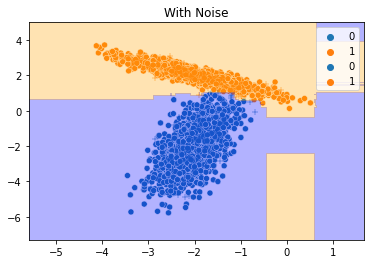

In [ ]:
# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем 

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

ind=y_test==y_pred; # индексы совпадений результата классификации и меток классов

plt.subplots(); 
ax2=plt.gca();
# рисуем "правильно" распознанные примеры
sns.scatterplot(X_test[ind,0],X_test[ind,1],hue=y_test[ind],ax=ax2);
# рисуем "неправильно" распознанные примеры
sns.scatterplot(X_test[~ind,0],X_test[~ind,1],hue=y_pred[~ind],ax=ax2,marker="+");
#sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test[:],ax=ax2,marker="+");

ax2.set_title("With Noise");

# считаем и рисуем разделяющую поверхность.
plot_step=0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # немного измененные минимальное и максимальые значения превого атрибута 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # немного измененные минимальное и максимальые значения второго атрибута 
# считаем прямоугольную сетку возможных значений этих атрибутов
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), #
                     np.arange(y_min, y_max, plot_step)) #
  
# считаем выход классификатора для всех примеров сетки
# не забыв что массивы данных нужно привести к требуемому размеру.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) # и преобразуем обратно в исходному размеру

# рисуем разделяющую поверхность
cs = plt.contourf(xx, yy, Z, levels=1, colors=['blue','orange'],alpha=0.3) # рисуем контурную карту
plt.show();

Выше не зря слова "правильно" и "неправильно" классифицированные взяты в кавычки. С точки зрения самого метода, крестиками обозначены неправильно классифицированные примеры, у которых метка результата не совпадает с исходной меткой класса в данных. Но как вы можете увидеть своими глазами, именно эти примеры данных были "шумом", т.е. специально сделанными неправильными примерами. И случайный лес справился, отсеял шум, распознав их верно с точки зрения нас как создателей данных.

Это важно осознать, когда мы считаем точность или другие метрики для классификаторов, то можем их посчитать только на тестовых данных. **Но никто не гарантирует что эти тестовые данные сами по себе не ошибочны!** 

Так что может быть такая ситуация, что точность маленькая, а классификатор работает отлично, игнорируя ошибки в самих данных. 

Попробуйте изменять максимальную глубину и число деревьев, посмотрите, как это влияет на разделяющую поверхность и точность.

Каждое дерево в лесу можно нарисовать, давайте посмотрим на одно из них.


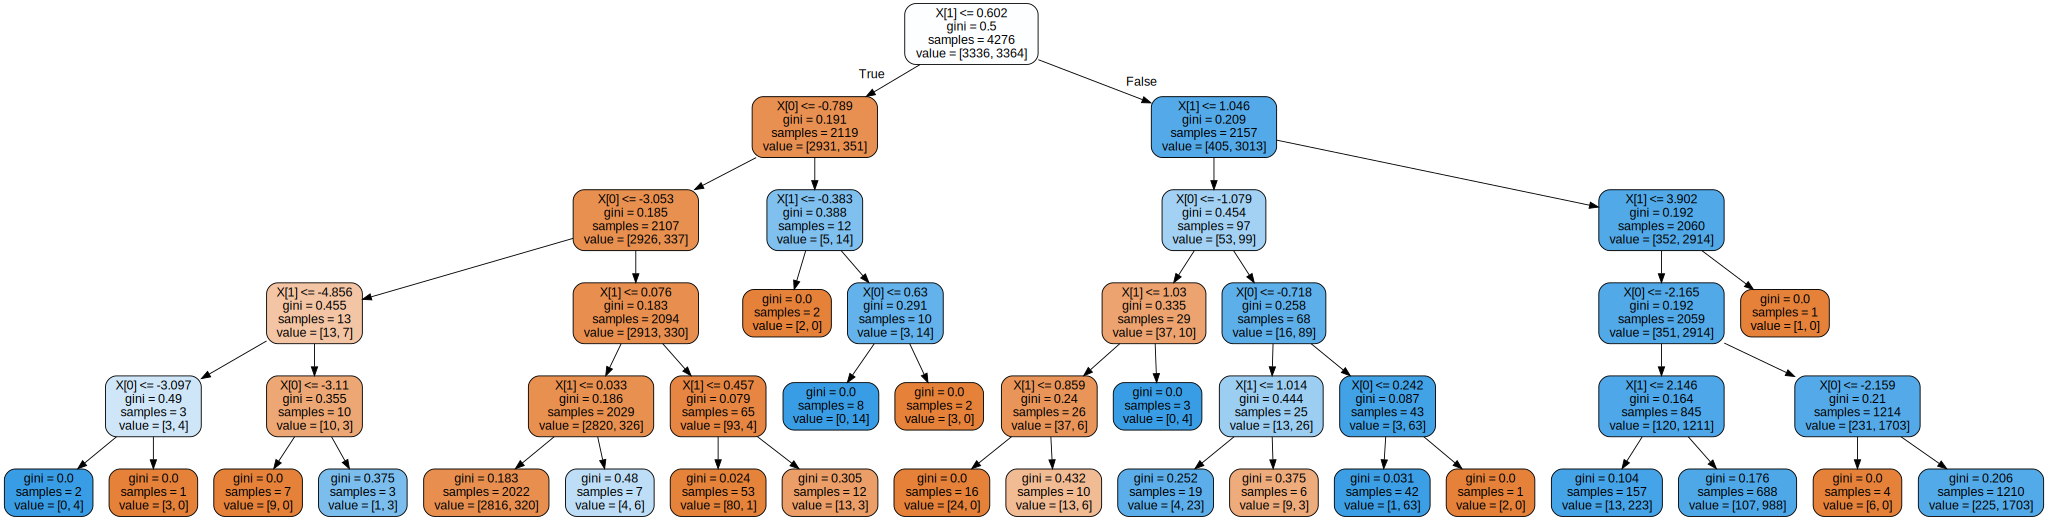

In [ ]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране


## Пример на другом наборе данных
Разумеется все тоже самое работает и на других наборах данных, многомерных.

Оценить качество классификации можно с помощью разных метрик, например аккуратность (accuracy) или F1-мера, и др. Вспомните, что они обозначают и как считаются. В `sklearn` такие метрики находятся в модуле  `metrics` под названиями `accuracy_score`, `precision_score`, `recall_score`, `f1_score`.

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
Accuracy= 0.9444444444444444
F1= 0.9435926310926311
Precision= 0.9422657952069716
Recall= 0.9482456140350877


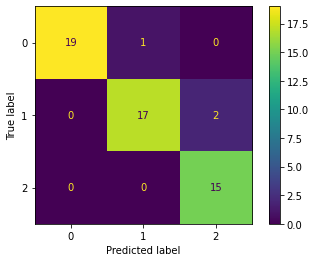

In [ ]:
from sklearn.datasets import load_wine
# загружаем данные
data_wine = load_wine()

# атрибуты
print("Features: ", data_wine.feature_names)

# метки классов
print("Labels: ", data_wine.target_names)
# 
X = data_wine.data
y = data_wine.target
# разделяем на обучающие и тестовые 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# создаем классификатор
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
# обучаем его
clf.fit(X_train, y_train)
# проверяем на тестовых данных
pred = clf.predict(X_test)
# считаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average="macro")
precision = precision_score(y_test, pred, average="macro")
recall=recall_score(y_test, pred, average="macro")
print('Accuracy=',accuracy)
print('F1=',f1)
print('Precision=',precision)
print('Recall=',recall)
plot_confusion_matrix(clf,X_test, y_test)

Визуализация модели

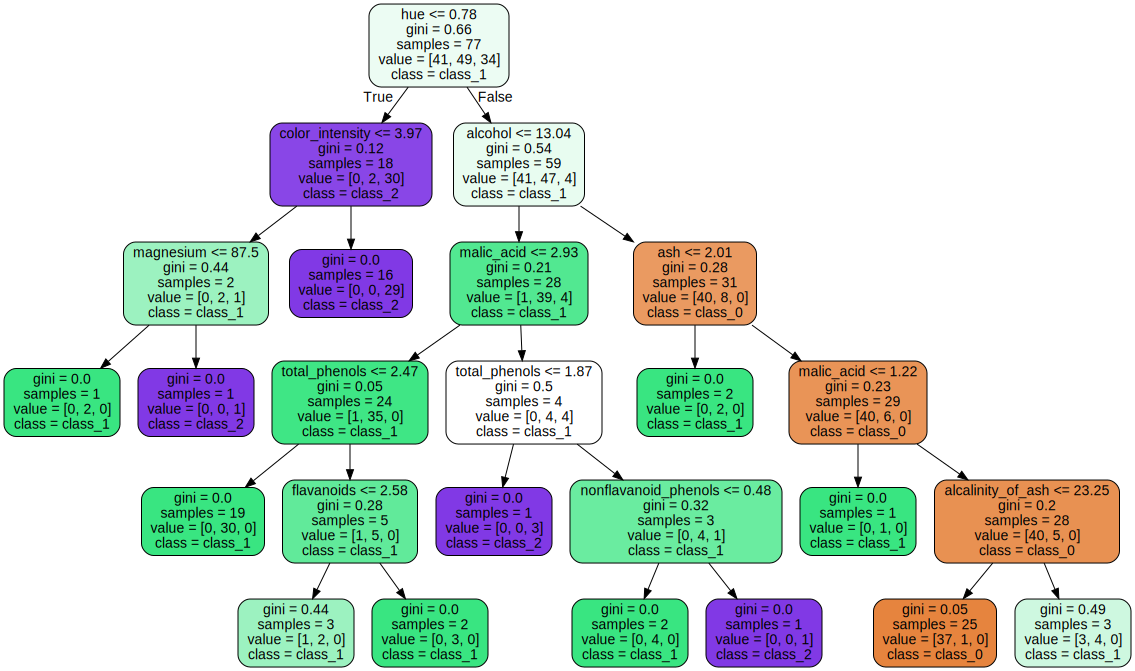

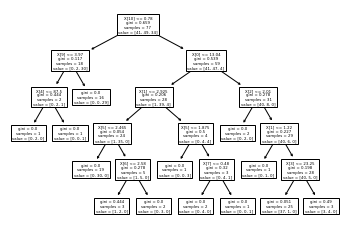

In [ ]:
# выбираем дерево из леса
estimator = clf.estimators_[5]
# рисуем его
import graphviz
from sklearn import tree
tree.plot_tree(estimator) ;
tree_data=tree.export_graphviz(estimator, out_file=None, 
                feature_names = data_wine.feature_names,
                class_names = data_wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True);

graph=graphviz.Source(tree_data,format='png');
graph


# Задание и обсуждение
Пробуйте изменять параметры случайного леса и смотрите как это влияет на качество решения задачи.
Попробуйте на своих данных.